<a href="https://colab.research.google.com/github/Projas-14/ADA-informes/blob/main/Informe10_TopologicalSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# algoritmo orden topológico
es una ordenación lineal de vértices tal que para cada arista dirigida uv, el vértice u viene antes que v en la ordenación.
La clasificación topológica de un grafo no es posible si el grafo no es un DAG. es decir es un grafo sin ciclos.

- Descripcion del problema
Tenemos un conjunto de datos el cual se encuentran representados en un grafo y Se busca encontrar un secuencia lineal para que estos datos se ordene.

- Entrada: Grafo dirigido sin ciclos $G=(V,E)$
- salida: orden topológico de los vertices del grafo $G$, asignado a cada vertice, tal que cada arco $(v,w) \in E$ de modo que se cumple que $f(v) < f(w)$ 


Ejemplo:
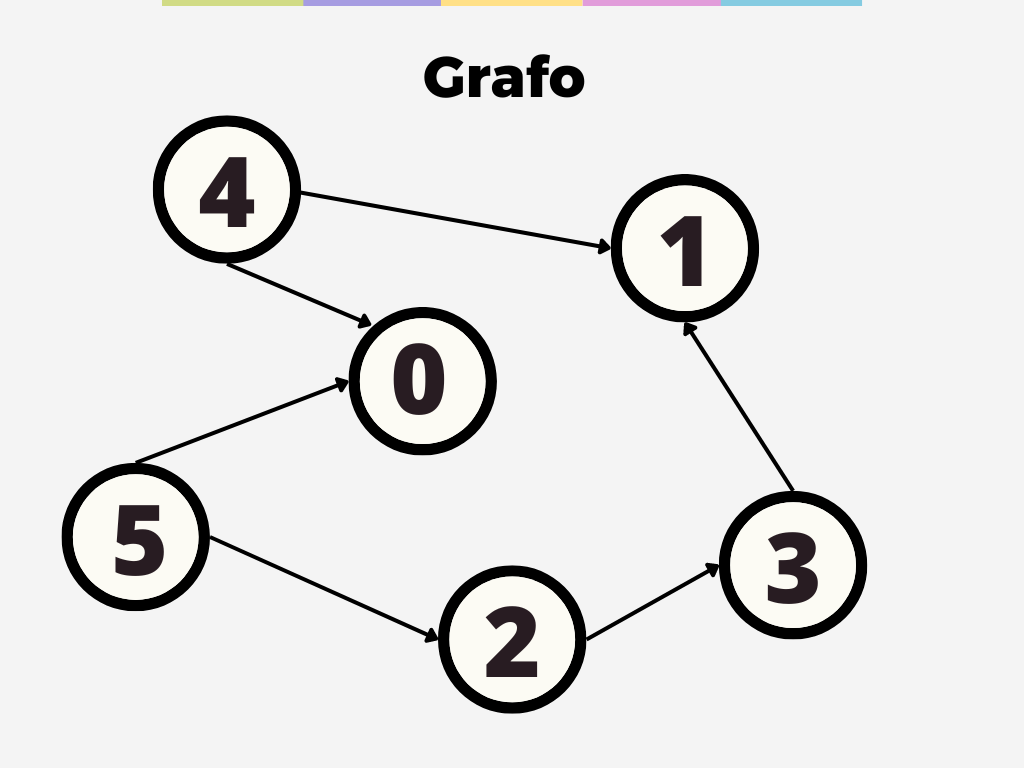

una clasificación topológica del siguiente gráfico es "5 4 2 3 1 0".
Puede haber más de una clasificación topológica para un gráfico. Otra ordenación topológica del siguiente gráfico es “4 5 2 3 1 0”. El primer vértice en la clasificación topológica es siempre un vértice con un grado de entrada de 0 (un vértice sin bordes entrantes).





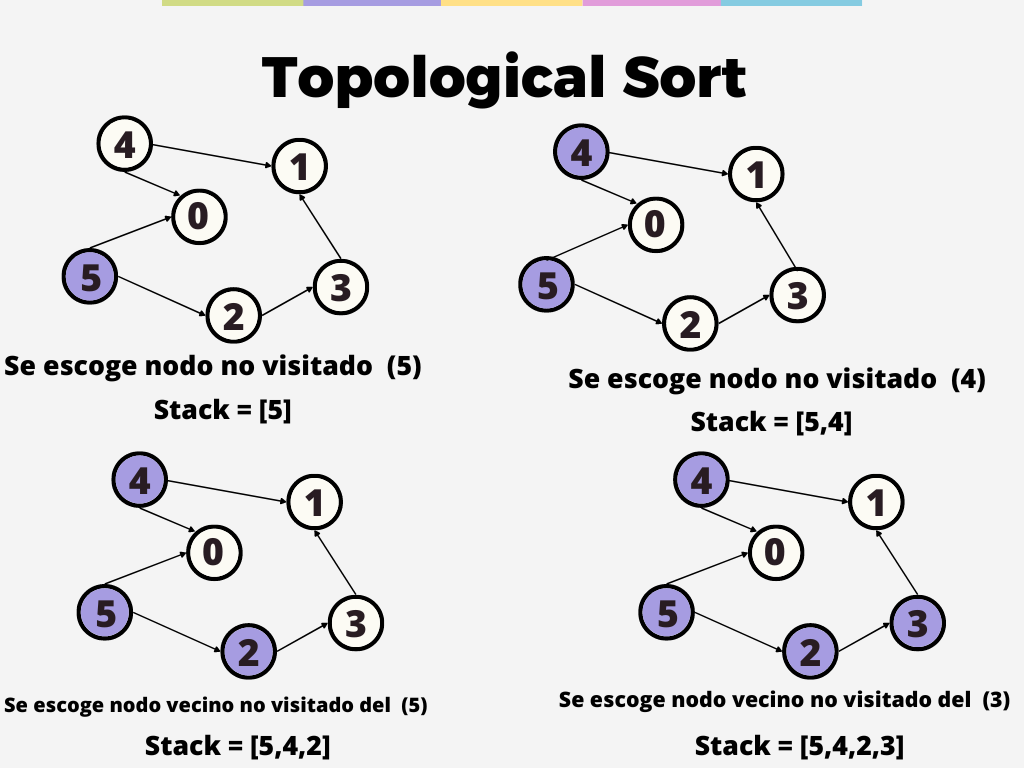

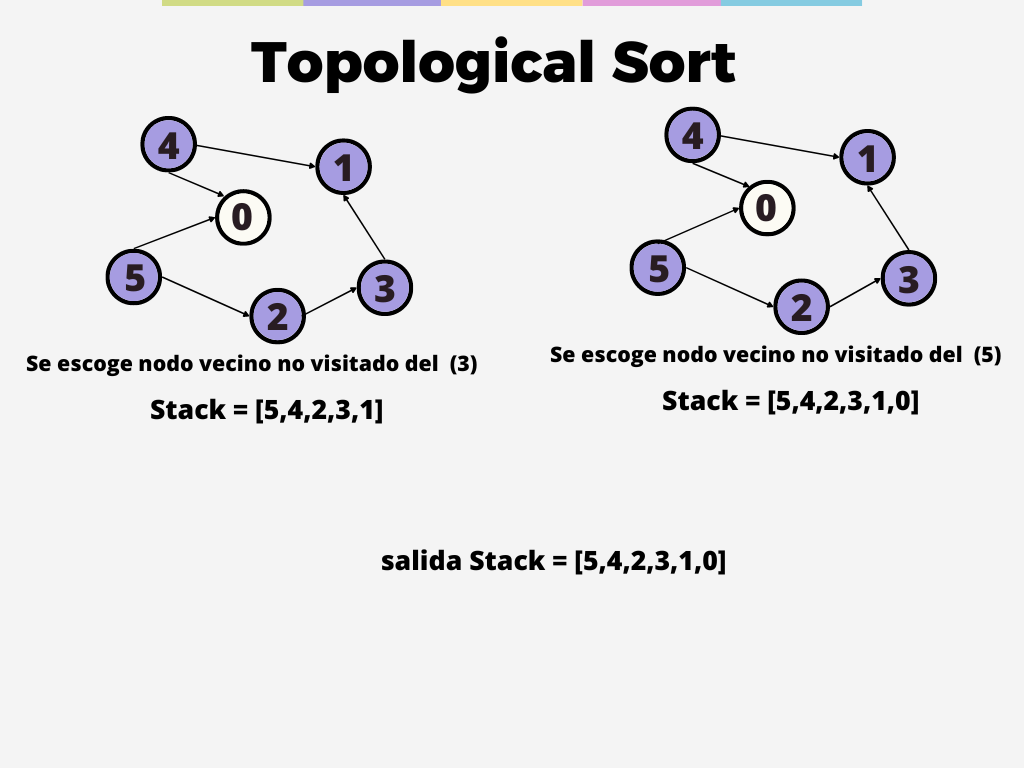

# Codigo DFS postorden iterativo (Depth First Search).

Funciones para graficar los grafos.

In [63]:
def topological_sort(digraph, verbose = False,  visualize=False):
    # digraph es un diccionario:
    # clave: un nodo
    # valor: un conjunto de nodos vecinos adyacentes

    # construir un diccionario mapeando nodos a sus
    # grafos
    
    #se crea el los grafos sin vecino 
    aux =[]



    graf = {node : 0 for node in digraph}
    for node in digraph:
        for neighbor in digraph[node]:
            if(neighbor in graf):
              graf[neighbor] += 1
            else:
              aux.append(neighbor)

    

    if(verbose == True):
      print("Se crea grafo con los nodos vecinos: ", graf)


    # rastrear nodos sin bordes entrantes
    nodos_sin_bordes_entrantes = []
    for node in digraph:
        if graf[node] == 0:
            nodos_sin_bordes_entrantes.append(node)
        if(verbose == True and nodos_sin_bordes_entrantes != []):
          print(" rastrear nodos sin bordes entrantes: ", nodos_sin_bordes_entrantes )
    
    # inicialmente, no hay nodos ordenados
    ordenado = [] 
                
    
    # siempre que haya nodos sin bordes entrantes
    # que se puede agregar
    while len(nodos_sin_bordes_entrantes) > 0:

        # agregar uno de esos nodos al pedido
        node = nodos_sin_bordes_entrantes.pop()
        ordenado.append(node)

        if(verbose == True):
          print("agregar uno de esos nodos al pedido: ", ordenado )
      
      # decrementar los vecinos de ese nodo
        for neighbor in digraph[node]:
          if(neighbor in graf):
            graf[neighbor] -= 1
            if graf[neighbor] == 0:
                nodos_sin_bordes_entrantes.append(neighbor)

    if( visualize==True):
      draw_graph(digraph)

    return ordenado  # llamada completa

In [54]:
graph={0: [], 1: [], 2: [3], 3: [1], 4: [0, 1], 5: [2, 0]}
print("Entrada:",graph)
print("salidad Orden Topologico: ",topological_sort(graph))



Entrada: {0: [], 1: [], 2: [3], 3: [1], 4: [0, 1], 5: [2, 0]}
salidad Orden Topologico:  [5, 2, 3, 4, 1, 0]


# Descripción del algoritmo



1. Se crea una lista auxiliar la cual guardara el orden topologico de los nodos.
2. se aplica DFS en post-orden para cada nodo del grado, entonces cuando un nodo es visitado se agrega este a la lista auxiliar.
3. Se retorna una lista auxiliar en reversa(inversa) la cual representa el orden topologico del grafo.


# DFS postorden recursivo

In [64]:

def topological_sort_recursivo(nodo):
  for vecino in grafo[nodo]:
    if vecino not in pila:
      topological_sort_recursivo(vecino)
  pila.insert(0,nodo)

def main(grafo):
  global pila
  for nodo in grafo:
    if nodo not in pila:
      topological_sort_recursivo(nodo)  
  print(pila)

grafo = {0: [], 1: [], 2: [3], 3: [1], 4: [0, 1], 5: [2, 0]}
pila = []

main(grafo)



[5, 4, 2, 3, 1, 0]


Explicacion del codigo en forma recursiva dado un nodo v la función Ordenar haría lo siguiente:

1. Lo marca como visitado
2. Para cada vecino de v que no haya sido visitado, llama otra vez a Ordenar(), pasándole ese vecino.
3. Mete en la pila v

# verbose algoritmo DFS postorden iterativo (Depth First Search).

In [65]:
from collections import defaultdict
import math
import random

# Crea un grafo sin ciclos de nodos de 0 a V - 1
# Retorna un dicionario [defaultdict(list)] 
# de key valor del nodo (0 a V - 1) y de value una 
# lista con los nodos a los cuales se conecta
def graph_instance_creator(V):
  nodes = random.sample(range(0, V), V)
  div = int(math.ceil(V / 4))

  current_div = div
  graph = defaultdict(list)
  for i in reversed(range(len(nodes))):
    selectables = []
    if (len(nodes) - current_div <= 0):
      selectables = random.sample(nodes, random.randint(1, len(nodes)))
    else:
      population = nodes[:len(nodes)-current_div]
      end = len(population) if len(population) < 4 else 4
      selectables = random.sample(population, random.randint(1, end))
    for selectable in selectables:
      if (nodes[i] != selectable and not selectable in graph[nodes[i]]):
        graph[nodes[i]].append(selectable)
    if (i < len(nodes) - current_div):
      current_div += div

  return graph

In [57]:
from collections import defaultdict
import networkx as nx

# Recibe un grafo de tipo [defaultdict(list)]
# Retorna un nx.DiGraph de la libreria networkx
def graph_to_nxdigraph(graph):
  nxdigraph = nx.DiGraph()
  for i in graph.keys():
    nxdigraph.add_node(i)
    for v in graph[i]:
      nxdigraph.add_edge(i, v)
  return nxdigraph


In [72]:
x = graph_to_nxdigraph(graph_instance_creator(5))
print(x)
print(topological_sort(x,True))

DiGraph with 5 nodes and 9 edges
Se crea grafo con los nodos vecinos:  {1: 0, 4: 3, 3: 2, 0: 4, 2: 0}
 rastrear nodos sin bordes entrantes:  [1]
 rastrear nodos sin bordes entrantes:  [1]
 rastrear nodos sin bordes entrantes:  [1]
 rastrear nodos sin bordes entrantes:  [1]
 rastrear nodos sin bordes entrantes:  [1, 2]
agregar uno de esos nodos al pedido:  [2]
agregar uno de esos nodos al pedido:  [2, 1]
agregar uno de esos nodos al pedido:  [2, 1, 3]
agregar uno de esos nodos al pedido:  [2, 1, 3, 4]
agregar uno de esos nodos al pedido:  [2, 1, 3, 4, 0]
[2, 1, 3, 4, 0]


#Demuestre por qué el algoritmo es correcto.

Para probar la correctitud del algoritmo observaremos el comportamiento de DFS.

DFS utiliza un stack, el cual utiliza la lógica LIFO (Last In First Out).

En cada ciclo del while primero se agrega un nodo padre, seguido de sus nodos hijos.

Analizando una conexión (u,v), v corresponde a un nodo descubierto y no visitado de u o no descubierto.  Si estuviese descubierto y visitado, debería existir una conexión previa (v,u), y el grafo no sería acíclico. 

Supongamos que al retirar un elemento del stack se le asigna un valor de referencia f(x) (que comienza en 0). Este valor aumenta en 1 a medida que se retiran elementos del stack


Teorema: 

para cualquier asignación f(u) y f(v) de una conexión (u,v), se cumple f(u) > f(v)

Si v es no descubierto, se marca como descubierto, luego como visitado y finalmente se retira del stack y se le agrega el valor de referencia f(v).

Si v es descubierto y visitado, no entra al stack.

Cuando u salga del stack, se le asignará un valor de refencia f(u), el cual trivialmente será mayor a f(v), debido a que saldrá inmediatamente después.



# Analice el tiempo de ejecución del algoritmo.

vamosn a dividir el algoritmo en partes, nosotros:

Determine el grado de entrada para cada nodo. 
Esto es $O(M)$tiempo (donde M es el número de aristas), ya que esto implica mirar cada arista dirigida en el gráfico una vez.
Encuentre nodos sin bordes entrantes. Este es un ciclo simple a través de todos los nodos con una cierta cantidad de anexos de tiempo constante. $O ( N )$ tiempo (donde N nos quedemos sin nodos sin bordes entrantes. Este bucle podría ejecutarse una vez para cada nodo:$O ( N )$veces. En el cuerpo, nosotros:

- Realice dos operaciones de tiempo constante en una matriz para agregar un nodo al ordenamiento topológico.
- Disminuya el grado de entrada para cada vecino del nodo que agregamos. Sobre todo el algoritmo, terminaremos haciendo exactamente una disminución para cada borde, haciendo este paso O(M)O ( M )tiempo en general .

Compruebe si incluimos todos los nodos o encontramos un ciclo. esto es rapido $O(1)$ comparación.

En conjunto, la complejidad del tiempo es $O(M+N)$

# Experimento
Observar lo que ocurre con el tiempo del algoritmo a medida que aumenta la cantidad de nodos del grafo.

Para realizar este experimento veremos el tiempo de ejecución del modelo iterativo de 10 a 199 nodos.

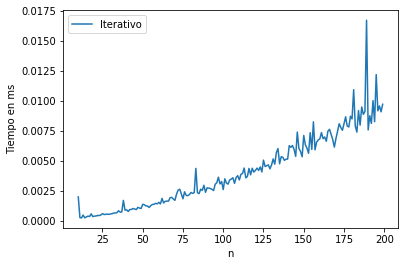

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import repeat

x=[]; y1=[]; 
#y2=[]

for n in range(10,200):
  G = graph_instance_creator(n)
  G = graph_to_nxdigraph(G)
  #H = G.copy()

  t1 = repeat(setup="from __main__ import topological_sort", stmt=lambda: topological_sort(G), repeat=1, number=10)
  #t2 = repeat(setup="from __main__ import main", stmt=lambda: main(H), repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  #y2.append(t2)

plt.plot(x,y1)
#plt.plot(x,y2)
plt.legend(["Iterativo"])
#plt.legend(["Recursivo"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Podemos apreciar en el gráfico el algoritmo iterativo  la complejidad del tiempo es  O(M+N) el cual se puede apreciar que se cumple en este grafico, Tambien se observa un Peaks en el tiempo de ejecucion esto puede ser por el procedimiento que ocupan recurso del procesador u otro comportamiento irregular.